# **1. Loading Data & Importing Relevant Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


df_original=pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
df=df_original.copy()
X1_test=pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")

In [2]:
df.shape

(116023, 52)

In [3]:
X1_test.shape

(29006, 51)

# **2. EDA & Feature Engineering/Extraction (Part - 1)**

In [4]:
pd.set_option('display.max_columns', 60)
print('Top 5 Columns of Training Dataset:')
df.head()

Top 5 Columns of Training Dataset:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,device.flashVersion,geoNetwork.region,trafficSource,totals.visits,geoNetwork.networkLocation,sessionId,os,geoNetwork.subContinent,trafficSource.medium,trafficSource.adwordsClickInfo.isVideoAd,browserMajor,locationCountry,device.browserSize,trafficSource.adwordsClickInfo.adNetworkType,socialEngagementType,geoNetwork.city,trafficSource.adwordsClickInfo.page,geoNetwork.metro,pageViews,locationZone,device.mobileDeviceModel,trafficSource.referralPath,totals.bounces,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,61421,(not set),not available in demo dataset,domain1,0,not available in demo dataset,1,not available in demo dataset,Washington,youtube.com,1,not available in demo dataset,1500100799,Windows,Northern America,referral,NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Redmond,NaN,Seattle-Tacoma WA,1.0,8,not available in demo dataset,/intl/hr/yt/about/,1.0,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,72287,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,California,(direct),1,not available in demo dataset,1495262065,Macintosh,Northern America,(none),NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Mountain View,NaN,San Francisco-Oakland-San Jose CA,1.0,8,not available in demo dataset,NaN,1.0,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,25180,(not set),not available in demo dataset,domain1,0,not available in demo dataset,2,not available in demo dataset,Lombardy,google,1,not available in demo dataset,1508510328,Windows,Southern Europe,organic,NaN,not available in demo dataset,Italy,not available in demo dataset,NaN,Not Socially Engaged,Milan,NaN,(not set),6.0,8,not available in demo dataset,NaN,NaN,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,not available in demo dataset,41295,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,not available in demo dataset,youtube.com,1,not available in demo dataset,1483431838,Windows,Eastern Asia,referral,NaN,not available in demo dataset,Japan,not available in demo dataset,NaN,Not Socially Engaged,not available in demo dataset,NaN,not available in demo dataset,1.0,8,not available in demo dataset,/yt/about/ja/,1.0,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,113697,(not set),not available in demo dataset,domain1,0,not available 

In [5]:
df.describe()

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


In [6]:
print('Unique Values in each column in Training Dataset:')
df.nunique()

Unique Values in each column in Training Dataset:


trafficSource.isTrueDirect                           1
purchaseValue                                     6766
browser                                             34
device.screenResolution                              1
trafficSource.adContent                             53
trafficSource.keyword                              566
screenSize                                           1
geoCluster                                           5
trafficSource.adwordsClickInfo.slot                  3
device.mobileDeviceBranding                          1
device.mobileInputSelector                           1
userId                                          100499
trafficSource.campaign                              28
device.mobileDeviceMarketingName                     1
geoNetwork.networkDomain                             3
gclIdPresent                                         2
device.operatingSystemVersion                        1
sessionNumber                                      230
device.fla

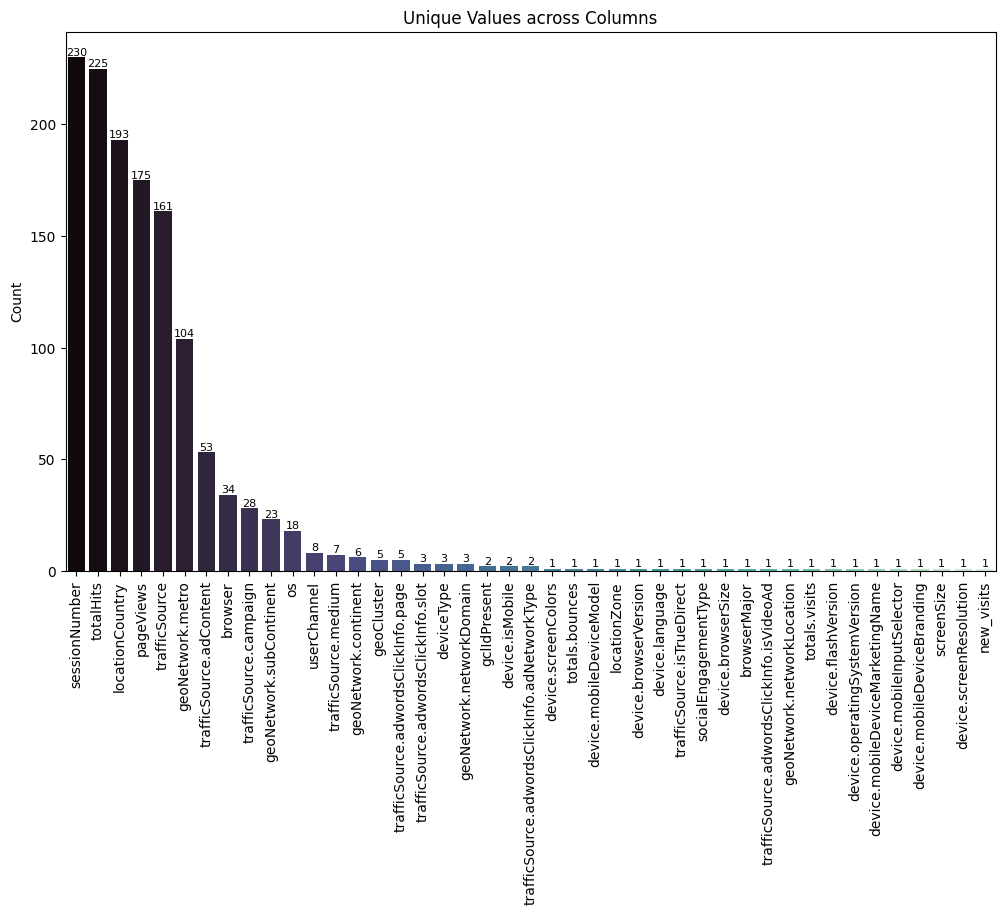

In [7]:
# unique values across columns

unq_value = df.nunique()
unq_val = unq_value[unq_value<300]
uv=unq_val.sort_values( ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x=uv.index, y=uv.values, palette='mako')
plt.title('Unique Values across Columns')
plt.ylabel('Count')
plt.xticks(rotation=90)
for i, v in enumerate(uv.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [9]:
null_cols = df.columns[df.isnull().any()].tolist() 
print('Columns containing null values:')
null_cols

Columns containing null values:


['trafficSource.isTrueDirect',
 'trafficSource.adContent',
 'trafficSource.keyword',
 'trafficSource.adwordsClickInfo.slot',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'trafficSource.adwordsClickInfo.adNetworkType',
 'trafficSource.adwordsClickInfo.page',
 'pageViews',
 'trafficSource.referralPath',
 'totals.bounces',
 'new_visits']

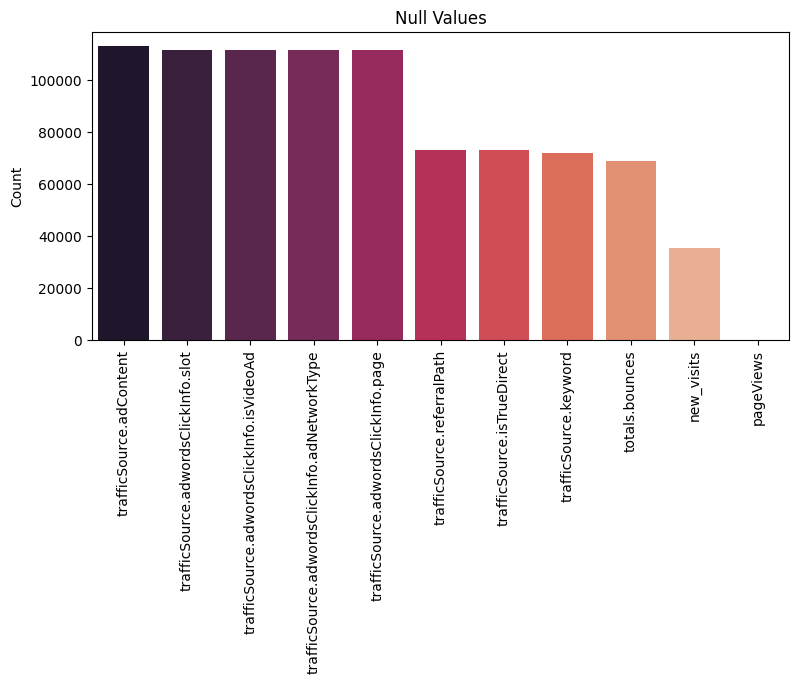

In [10]:
# null values across columns

null_val = df.isnull().sum()
nvalue = null_val[null_val>0]
nv=nvalue.sort_values( ascending=False)

plt.figure(figsize=(9,4))
sns.barplot(x=nv.index, y=nv.values, palette='rocket')
plt.title('Null Values')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [11]:
df['geoNetwork.continent'].value_counts()

geoNetwork.continent
Americas     69856
Asia         22384
Europe       20294
Africa        1747
Oceania       1606
(not set)      136
Name: count, dtype: int64

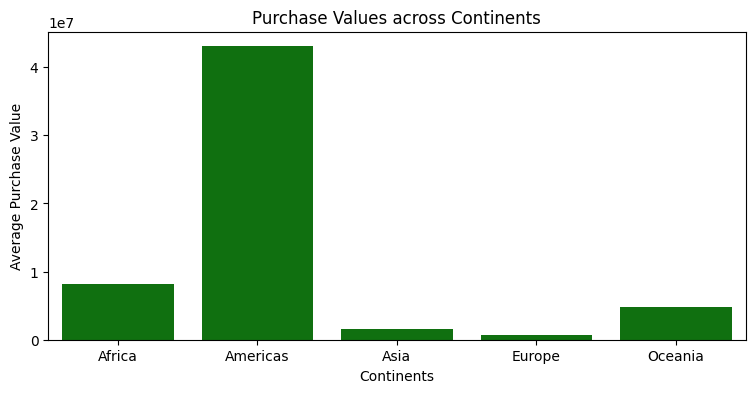

In [12]:
# conversion insights across continents

loc = df.groupby('geoNetwork.continent')['purchaseValue'].mean().reset_index()
loc_values = loc[loc['geoNetwork.continent'] != '(not set)']

plt.figure(figsize=(9,4))
sns.barplot(data=loc_values, x='geoNetwork.continent', y='purchaseValue', color='green')
plt.title('Purchase Values across Continents')
plt.xlabel('Continents')
plt.ylabel('Average Purchase Value')
plt.xticks(ticks=range(len(loc_values)), labels=loc_values['geoNetwork.continent'].astype(str))
plt.show()

**The American Counterparts show the highest purchase value among all continents, leading with a large margin while Europe has made the least conversions in value, even though it is has a massive engagement rate (in top 3) potraying - either many users donnot convert or those who do, contribute in limited purchases.**

In [13]:
df['trafficSource'].nunique()

161

In [14]:
print('Unique Traffic Sources:', df['trafficSource'].value_counts())

Unique Traffic Sources: trafficSource
google                  44332
(direct)                36837
youtube.com             19211
mall.googleplex.com      6388
analytics.google.com     1826
                        ...  
br.search.yahoo.com         1
mail.yahoo.com              1
yandex                      1
images.google.de            1
search.1and1.com            1
Name: count, Length: 161, dtype: int64


In [15]:
def sources(trafficSource):
    trafficSource = str(trafficSource).lower()
    if 'google' in trafficSource or '(not set)' in trafficSource:
        return 'Google'
    elif 'youtube' in trafficSource:
        return 'Youtube'
    elif 'dfa' in trafficSource:
        return 'DFA'
    elif 'facebook' in trafficSource or 'messenger' in trafficSource:
        return 'Facebook'
    elif 'yahoo' in trafficSource:
        return 'Yahoo'
    elif 'reddit' in trafficSource:
        return 'Reddit'
    elif 'direct' in trafficSource:
        return 'Direct'
    else:
        return 'Others'

In [16]:
df['trafficSource']=df['trafficSource'].apply(sources)

In [17]:
print('New Traffic Sources Categories Include:', df['trafficSource'].value_counts())

New Traffic Sources Categories Include: trafficSource
Google      54646
Direct      36837
Youtube     19214
Others       3526
Facebook      731
DFA           617
Reddit        240
Yahoo         212
Name: count, dtype: int64


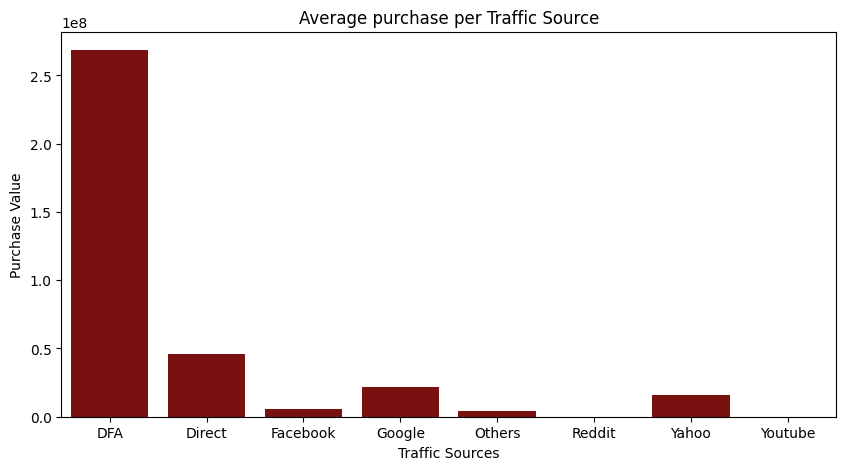

In [18]:
#average purchases by traffic sources

sources_value= df.groupby('trafficSource')['purchaseValue'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=sources_value, x='trafficSource', y='purchaseValue',color='darkred')
plt.title('Average purchase per Traffic Source')
plt.xlabel('Traffic Sources')
plt.ylabel('Purchase Value')
plt.xticks(ticks=range(len(sources_value['trafficSource'])), label=sources_value['trafficSource'].astype(str))
plt.show()

**The raw data constitutes of 161 unique traffic sources with recurring terms in their URL like 'google', 'yahoo', 'youtube',etc. These sources were then cumulated based on the patterns in the URLs and were concluded into 7 popular categories and the remaining were aggregated into 'Others'.
While 'Google' Channel group led with the highest engagement, 'DFA' led the purchases with a massive difference in contrast to its lower user interactions.**

In [19]:
print('Unique Browser Values in Train Dataset:', df['browser'].value_counts())

Unique Browser Values in Train Dataset: browser
Chrome                                                  84508
Safari                                                  19184
Firefox                                                  4031
Internet Explorer                                        2155
Android Webview                                          1472
Edge                                                     1216
Safari (in-app)                                           793
Opera Mini                                                733
Samsung Internet                                          563
Opera                                                     548
UC Browser                                                296
YaBrowser                                                 187
Amazon Silk                                                73
Coc Coc                                                    61
Android Browser                                            59
Mozilla Compatible Age

In [20]:
def browsers(browser):
    if 'Safari' in browser:
        return "Safari"
    elif 'Edge' in browser:
        return 'Edge'
    elif 'Chrome' in browser or 'MRCHROME' in browser:
        return 'Chrome'
    elif 'Mozilla' in browser or 'Firefox' in browser:
        return 'Firefox'
    elif 'Internet' in browser:
        return 'Internet Explorer'
    elif 'Browser' in browser or 'Android' in browser:
        return "Android Browsers"
    elif 'Opera' in browser:
        return 'Opera'
    else:
        return 'Others'

In [21]:
df['browser']=df['browser'].apply(browsers)

In [22]:
print('New Browser Categories are:',df['browser'].value_counts())

New Browser Categories are: browser
Chrome               84530
Safari               19977
Firefox               4068
Internet Explorer     2718
Android Browsers      2046
Opera                 1281
Edge                  1216
Others                 187
Name: count, dtype: int64


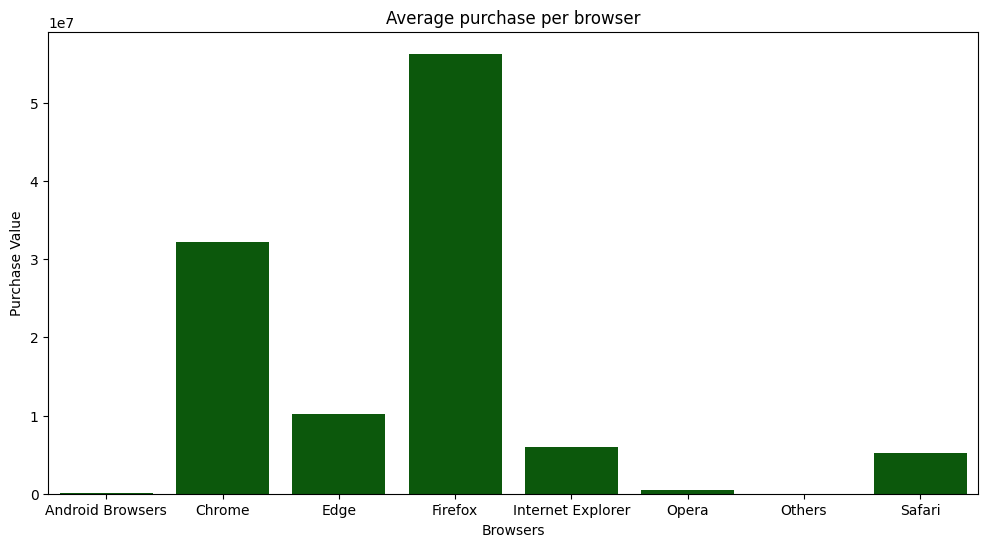

In [23]:
#average purchases by browser categories

browser_categ = df.groupby('browser')['purchaseValue'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=browser_categ, x='browser', y='purchaseValue',color='darkgreen')
plt.title('Average purchase per browser')
plt.xlabel('Browsers')
plt.ylabel('Purchase Value')
plt.xticks(ticks=range(len(browser_categ['browser'])), label=browser_categ['browser'].astype(str))
plt.show()

**The browser category was segregated into confined unique categories potraying clear patterns with respect to their purchasing capabilties - Firfox and Chrome leading in both user engagement and cumulative purchase values.**

In [24]:
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['DayOfWeek'] = df['date'].dt.dayofweek
df=df.drop(columns=['date'])

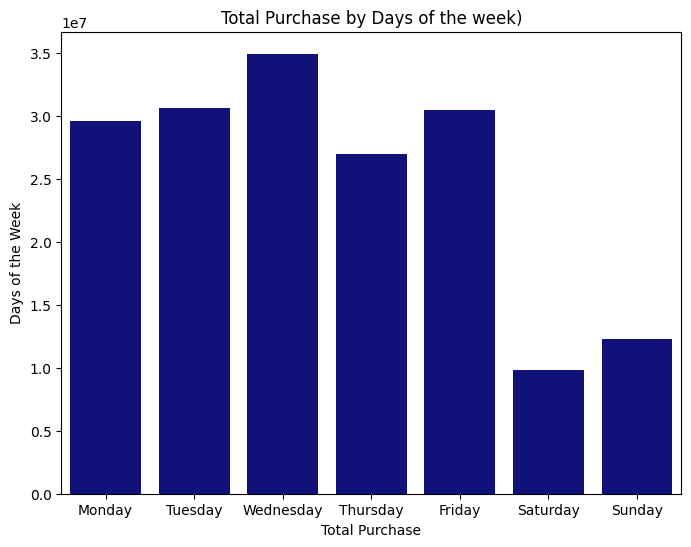

In [25]:
# average purchase per day of the week across all years

daily_avg=df.groupby('DayOfWeek')['purchaseValue'].mean().reset_index()
import calendar
daily_avg['DayName'] = daily_avg['DayOfWeek'].apply(lambda x: calendar.day_name[x])

plt.figure(figsize=(8,6))
sns.barplot(data=daily_avg, x='DayName', y='purchaseValue', color='darkblue')
plt.ylabel('Days of the Week')
plt.xlabel('Total Purchase')
plt.xticks(ticks=range(len(daily_avg)),labels=daily_avg['DayName'].astype(str))  
plt.title('Total Purchase by Days of the week)')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


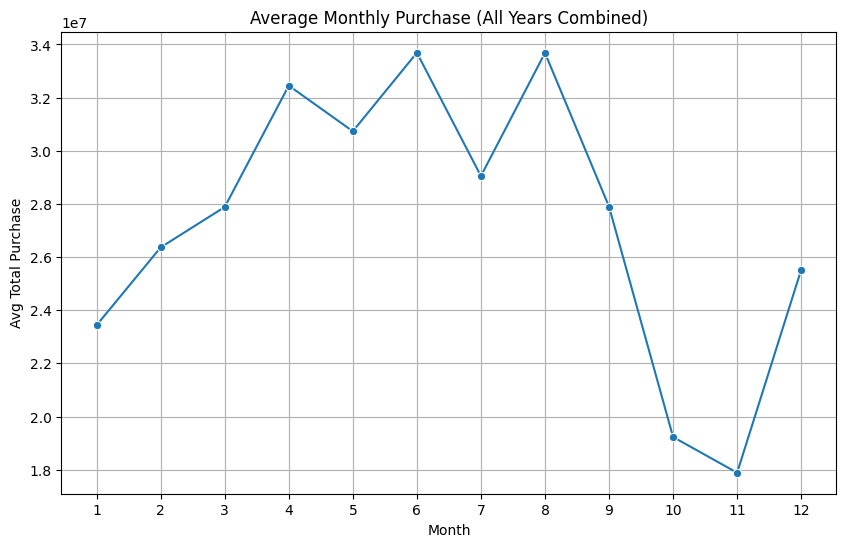

In [26]:
# average purchase per month across all years
monthly_avg = df.groupby('Month')['purchaseValue'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_avg, x='Month', y='purchaseValue', marker='o')
plt.title("Average Monthly Purchase (All Years Combined)")
plt.ylabel("Avg Total Purchase")
plt.xlabel("Month")
plt.xticks(range(1, 13)) 
plt.grid(True)
plt.show()

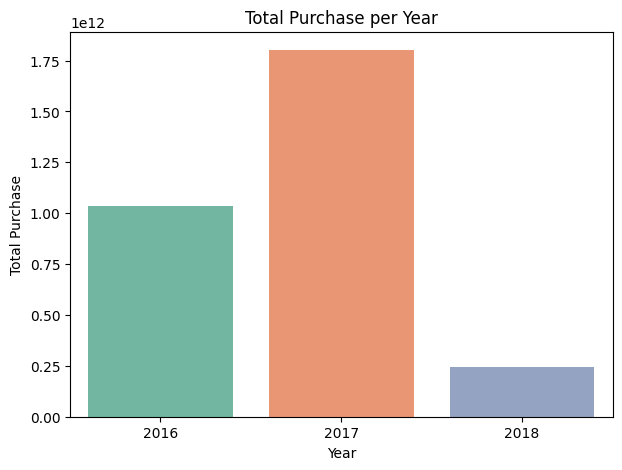

In [27]:
#total purchase per year
yearly_total = df.groupby('Year')['purchaseValue'].sum().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=yearly_total, x='Year', y='purchaseValue', palette='Set2')
plt.title("Total Purchase per Year")
plt.ylabel("Total Purchase")
plt.xlabel("Year")
plt.xticks(ticks=range(len(yearly_total)), labels=yearly_total['Year'].astype(str))  
plt.show()

**The 'date' column was broken down into distinct features: Day, Month, Year and Day of the Week (0-6).
The dataset spans three years, with 2017 contributing the highest total purchase value.
Clear trends emerged - weekday purchases significantly outpaced weekends, purchases peaked between May and July, and there was a notable decline in purchasing activity in 2018.**

In [28]:
print('Original os value counts:', df['os'].value_counts())

Original os value counts: os
Windows             39135
Macintosh           37659
Android             15866
iOS                 12762
Linux                5075
Chrome OS            4743
(not set)             565
Windows Phone          95
Samsung                46
Tizen                  22
BlackBerry             18
Nintendo Wii           14
Xbox                    9
Nintendo WiiU           6
OS/2                    4
Playstation Vita        2
Firefox OS              1
FreeBSD                 1
Name: count, dtype: int64


In [29]:
def os(os):
    if 'Windows' in os or 'not set' in os:
        return 'Windows'
    elif 'Macintosh' in os or 'iOS' in os:
        return 'macOS'
    elif 'Chrome' in os:
        return 'Chrome OS'
    elif 'Linux' in os:
        return 'Linux'
    else:
        return 'Android'

In [30]:
df['os']=df['os'].apply(os)

In [31]:
print('New OS value counts:', df['os'].value_counts())

New OS value counts: os
macOS        50421
Windows      39795
Android      15989
Linux         5075
Chrome OS     4743
Name: count, dtype: int64


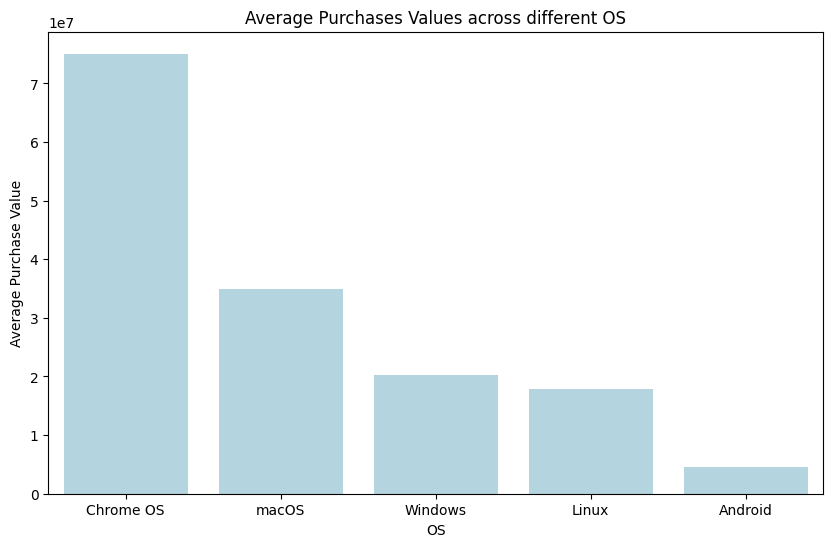

In [32]:
#average purchase values across different os
os_value1=df.groupby('os')['purchaseValue'].mean().reset_index()
os_value=os_value1.sort_values(by='purchaseValue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=os_value,x='os',y='purchaseValue',color='#ADD8E6')
plt.title('Average Purchases Values across different OS')
plt.xlabel('OS')
plt.ylabel('Average Purchase Value')
plt.xticks(ticks=range(len(os_value)),labels=os_value['os'].astype(str))
plt.show()

**The operating system (OS) categories were analysed and grouped based on their frequency in the training dataset.
Interestingly, Chrome OS, despite having the lowest user engagement, recorded the highest purchase value.
This suggests that although fewer users engaged through Chrome OS, those who did made substantially large individual purchases.**

In [33]:
df['purchaseValue'].value_counts()

purchaseValue
0.0            92038
16990000.0       445
18990000.0       328
33590000.0       308
19990000.0       288
               ...  
23860000.0         1
16020000.0         1
253930000.0        1
26250000.0         1
169750000.0        1
Name: count, Length: 6766, dtype: int64

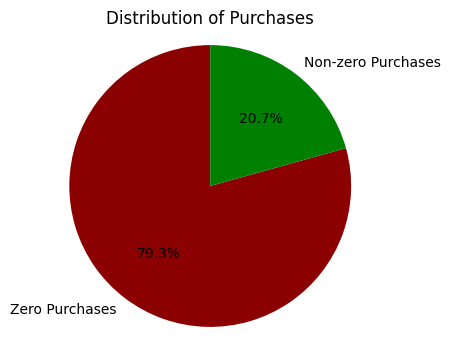

In [34]:
zpurchase = df[df['purchaseValue']==0]
nzpurchase= df[df['purchaseValue']>0]

labels = ['Zero Purchases', 'Non-zero Purchases']
sizes = [len(zpurchase), len(nzpurchase)]

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['darkred','green'])
plt.title('Distribution of Purchases')
plt.axis('equal')  
plt.show()

**The pie chart highlights a classic case of class imbalance between zero and non-zero purchases.
More than three-fourth of the recorded purchases result in zero value while the remaining conversions represent high-value transactions, often in the tens or hundreds of lakhs.
This stark contrast leads to a significant class disparity.**

# **3. Data Cleaning**

In [35]:
drop_cols=[
    # single- valued columns
    'trafficSource.adwordsClickInfo.slot',
    'trafficSource.adContent',
    'trafficSource.adwordsClickInfo.isVideoAd',
    'device.mobileDeviceBranding',
    'device.mobileInputSelector',
    'trafficSource.adwordsClickInfo.adNetworkType',
    'trafficSource.adwordsClickInfo.page',
    'device.language', 'locationZone', 'device.screenResolution', 'screenSize',
    'device.mobileDeviceMarketingName','device.operatingSystemVersion', 'device.flashVersion',
    'device.screenColors', 'device.browserVersion', 'device.browserSize',
    'socialEngagementType', 'device.mobileDeviceModel', 'browserMajor',
    # null-valued columns
    'trafficSource.keyword','trafficSource.referralPath','trafficSource.campaign',
    'geoNetwork.city','geoNetwork.metro','geoNetwork.networkLocation','geoNetwork.region', 'locationCountry',
    # binary-valued, inter-related, less significant
    'totals.visits','gclIdPresent','trafficSource.isTrueDirect','totals.bounces','device.isMobile',
    # high - cardinality identifiers
    'sessionStart','userId','sessionId'
]

In [36]:
df = df.drop(columns=drop_cols)

In [37]:
def clean_data(df):
    df['new_visits']=df['new_visits'].replace(np.nan,0)
   # df['locationCountry']=df['locationCountry'].replace('(not set)',np.nan)
    #df['locationCountry'] = df['locationCountry'].fillna(df['locationCountry'].mode())
    df['geoNetwork.subContinent']=df['geoNetwork.subContinent'].replace('(not set)',np.nan)
    df['geoNetwork.subContinent'] = df['geoNetwork.subContinent'].fillna(df['geoNetwork.subContinent'].mode())
    df['geoNetwork.continent']=df['geoNetwork.continent'].replace('(not set)',np.nan)
   # df['trafficSource.medium']=df['trafficSource.medium'].replace('(not set)',np.nan)
    # df['trafficSource.medium']=df['trafficSource.medium'].replace('(none)',np.nan)
    df['userChannel']=df['userChannel'].replace('(Other)',np.nan)
    df['pageViews'] = df['pageViews'].fillna(df['pageViews'].mean())
    return df

df=clean_data(df)
df.isnull().sum()

purchaseValue                 0
browser                       0
geoCluster                    0
geoNetwork.networkDomain      0
sessionNumber                 0
trafficSource                 0
os                            0
geoNetwork.subContinent     136
trafficSource.medium          0
pageViews                     0
deviceType                    0
userChannel                  10
totalHits                     0
geoNetwork.continent        136
new_visits                    0
Year                          0
Month                         0
Day                           0
DayOfWeek                     0
dtype: int64

In [38]:
df.drop_duplicates(inplace=True)

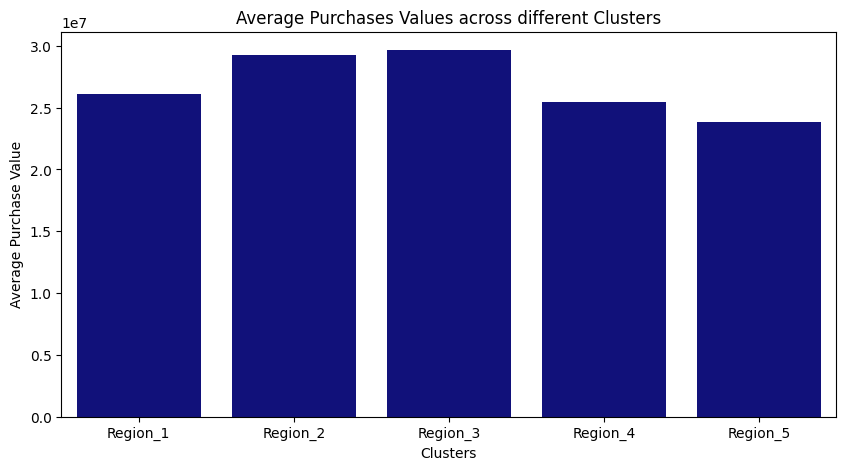

In [39]:
#average purchase values across different clusters

gvalue=df.groupby('geoCluster')['purchaseValue'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=gvalue,x='geoCluster',y='purchaseValue',color='darkblue')
plt.title('Average Purchases Values across different Clusters')
plt.xlabel('Clusters')
plt.ylabel('Average Purchase Value')
plt.xticks(ticks=range(len(gvalue)),labels=gvalue['geoCluster'].astype(str))
plt.show()

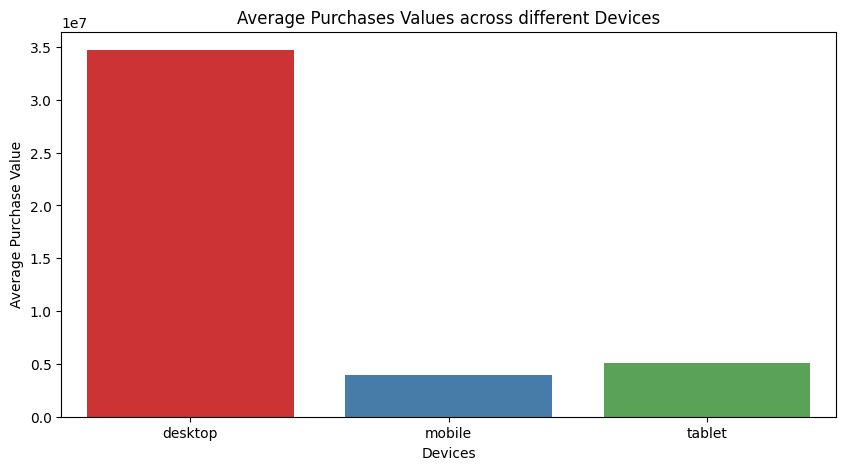

In [40]:
#average purchase values across different devices

devvalue=df.groupby('deviceType')['purchaseValue'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=devvalue,x='deviceType',y='purchaseValue',palette='Set1')
plt.title('Average Purchases Values across different Devices')
plt.xlabel('Devices')
plt.ylabel('Average Purchase Value')
plt.xticks(ticks=range(len(devvalue)),labels=devvalue['deviceType'].astype(str))
plt.show()

In [41]:
df.drop(columns=['deviceType','geoCluster','trafficSource.medium'], inplace= True)
X1_test.drop(columns=['deviceType','geoCluster','trafficSource.medium'], inplace= True)

# **4. Feature Engineering (Part- 2)**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


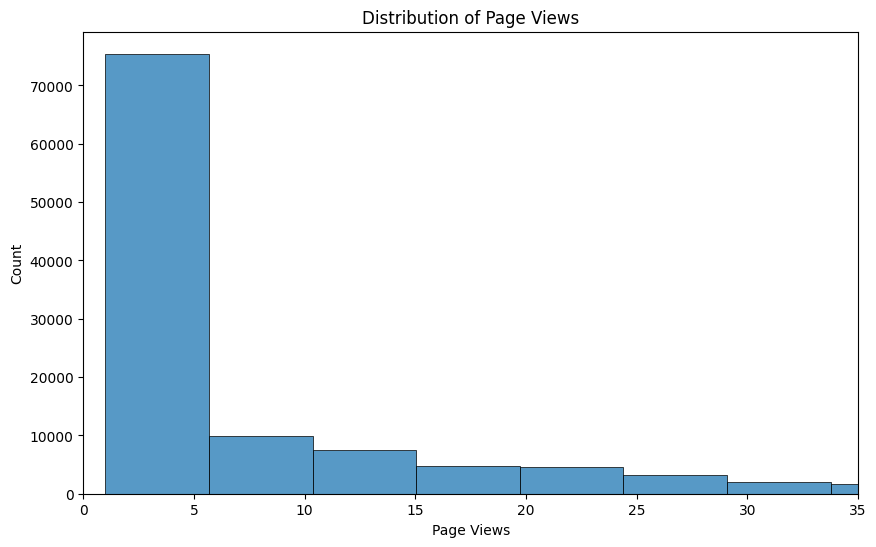

In [42]:
# page views distribution

plt.figure(figsize=(10,6))
sns.histplot(df['pageViews'], bins=100)
plt.title('Distribution of Page Views')
plt.xlabel('Page Views')
plt.ylabel('Count')
plt.xlim(0, df['pageViews'].quantile(0.95))  
plt.show()

In [43]:
bins = [-1, 1, 3, 5, 10, 20, 50, df['pageViews'].max()]
labels = ['1', '2–3', '4–5', '6–10', '11–20', '21–50', '50+']
df['user_activity'] = pd.cut(df['pageViews'], bins=bins, labels=labels, include_lowest=True)

In [44]:
pv = df['pageViews'].quantile(0.99)
df['heavy_pv'] = (df['pageViews'] > pv).astype(int)
df['heavy_pv'].value_counts()

heavy_pv
0    112723
1      1090
Name: count, dtype: int64

In [45]:
df['sessionNumber'].value_counts()

sessionNumber
1      78453
2      14692
3       6599
4       3756
5       2317
       ...  
143        1
147        1
196        1
319        1
406        1
Name: count, Length: 230, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


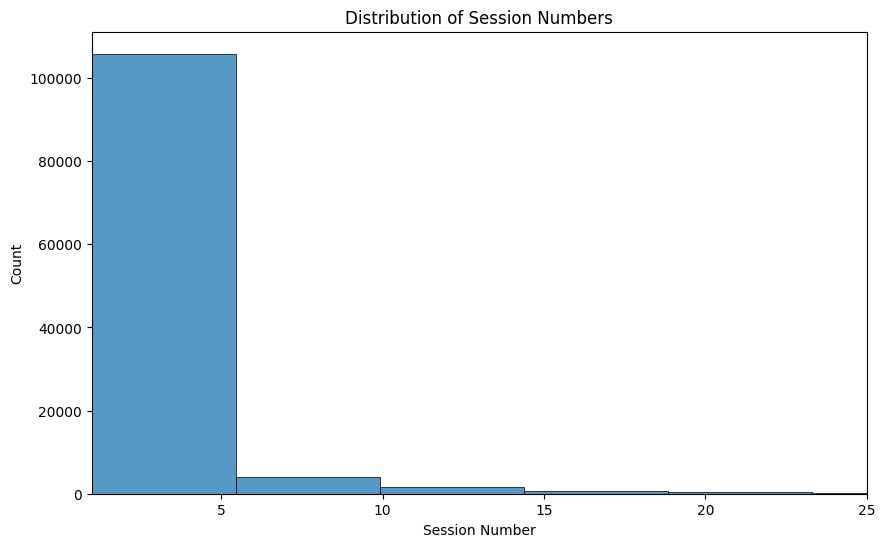

In [46]:
# session number distribution

plt.figure(figsize=(10,6))
sns.histplot(df['sessionNumber'], bins=100)
plt.title('Distribution of Session Numbers')
plt.xlabel('Session Number')
plt.ylabel('Count')
plt.xlim(1, df['sessionNumber'].quantile(0.99))  
plt.show()

In [47]:
sess_bins = [-1, 1, 3, 5, 8, 10, 50, df['sessionNumber'].max()]
sess_labels = ['1', '2-3', '4-5', '6-8', '9-10', '11-50', '50+']
df['session_activity']= pd.cut(df['sessionNumber'], bins=sess_bins, labels=sess_labels, include_lowest=True)

In [48]:
# # total Hits distribution

# plt.figure(figsize=(10,6))
# sns.histplot(df['totalHits'], bins=100)
# plt.title('Distribution of Total Hits')
# plt.xlabel('Total Hits')
# plt.ylabel('Count')
# plt.xlim(1, df['totalHits'].quantile(0.95))  
# plt.show()

In [49]:
# hbins = [-1, 1, 3, 5, 7, 10, 20, 30, 50, df['totalHits'].max()]
# hlabels = ['1','2-3','4-5','6-7','8-10','11-20','21-30','31-50','50+']
# df['hits_activity'] = pd.cut(df['totalHits'], bins=hbins, labels=hlabels, include_lowest=True)

In [50]:
df['hits/page_view'] = df['totalHits']/df['pageViews']
df['page_views/session'] = df['pageViews']/df['sessionNumber']
df['interaction1'] = df['pageViews'] * df['sessionNumber']
df['quick_exit'] = (df['hits/page_view'] < 2).astype(int)

# df['interaction2'] = df['totalHits'] * df['pageViews']
# df['hits/session'] = df['totalHits']/df['sessionNumber']
# df['new_users_pveng'] = df['new_visits']*df['pageViews']
# df['new_users_sneng'] = df['new_visits']*df['sessionNumber']
# df['new_users_theng'] = df['new_visits']*df['totalHits']

In [51]:
def low_activity(pv,hits,sn):
    if pv==hits and pv==sn:
        return 1
    else:
        return 0

df['low_activity'] = df.apply(lambda row: low_activity(row['pageViews'],row['totalHits'],row['sessionNumber']), axis=1)

In [52]:
def prob(new_visits, pageViews, sessionNumber):
    if new_visits == 1 and pageViews < 5 and sessionNumber < 3:
        return 'Not Likely'
    elif new_visits == 1 and pageViews in range(5,16) and sessionNumber < 6:
        return 'Likely'
    elif pageViews > 15 and sessionNumber > 5:
        return 'Most Likely'
    else:
        return 'Indefinite'

df['conversion_probability'] = df.apply(lambda row: prob(row['new_visits'], row['pageViews'], row['sessionNumber']), axis=1)

In [53]:
def quarters(month):
    if month<4:
        return 'Q1'
    elif month<7:
        return 'Q2'
    elif month<10:
        return 'Q3'
    else:
        return 'Q4'
df['Quarter']=df['Month'].apply(quarters)

In [54]:
df['month_year'] = df['Month'].astype(str)+'_'+df['Year'].astype(str)
df['q_month'] = df['Quarter'].astype(str)+'_'+df['Month'].astype(str)

In [55]:
# def is_eom(day):
#     if day in range(28,32):
#         return 1
#     else:
#         return 0

# df['eom'] = df['Day'].apply(is_eom)

In [56]:
# def is_session_bounce(sessionNumber,pageViews):
#     if sessionNumber==1 and pageViews==1:
#         return 1
#     else:
#         return 0

# df['is_session_bounce'] = df.apply(lambda row: is_session_bounce(row['sessionNumber'],row['pageViews']), axis=1)    
# df['is_session_bounce'].value_counts()

In [57]:
# def purchase(traffic_source, medium, conversion_probability):
#     source_medium = f"{traffic_source}/{medium}"
    
#     if source_medium in ('dfa/cpm', '(direct)/none') and conversion_probability == 'Most Likely':
#         return 'High'
#     elif source_medium in ('google/organic', '(direct)/none') and conversion_probability in ('Likely', 'Less Likely'):
#         return 'Medium'
#     else:
#         return 'Low'

# df['pvalues'] = df.apply(lambda row: purchase(row['trafficSource'], row['trafficSource.medium'], row['conversion_probability']), axis=1)

In [58]:
# def pvalue(day,month,year):
#     if day<5 and month in range(4,9) and year in (2016,2017):
#         return 'High'
#     else:
#         return 'Low'

# df['pvalues'] = df.apply(lambda row: pvalue(row['DayOfWeek'], row['Month'], row['Year']), axis=1)

In [59]:
print(df.columns)

Index(['purchaseValue', 'browser', 'geoNetwork.networkDomain', 'sessionNumber',
       'trafficSource', 'os', 'geoNetwork.subContinent', 'pageViews',
       'userChannel', 'totalHits', 'geoNetwork.continent', 'new_visits',
       'Year', 'Month', 'Day', 'DayOfWeek', 'user_activity', 'heavy_pv',
       'session_activity', 'hits/page_view', 'page_views/session',
       'interaction1', 'quick_exit', 'low_activity', 'conversion_probability',
       'Quarter', 'month_year', 'q_month'],
      dtype='object')


# **5. Data Preprocessing & Transformations**

In [60]:
X=df.drop(columns='purchaseValue')
y=df['purchaseValue']

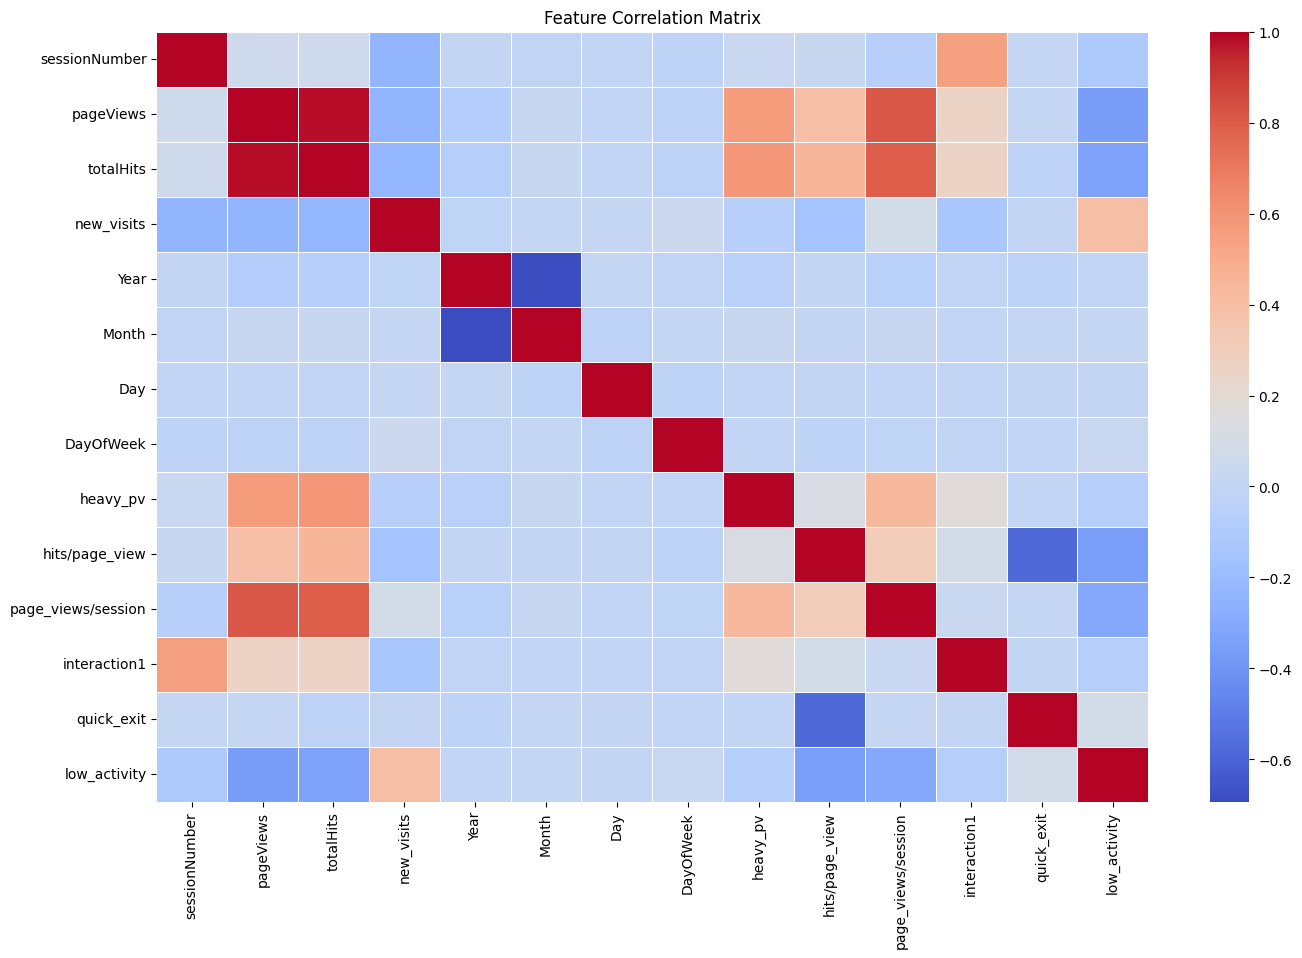

In [61]:
# correlation between numerical features

X_num = X.select_dtypes(include=['int64', 'float64', 'int32', 'float32']) 
corr_matrix = X_num.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import category_encoders as ce

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


encoder_te= ce.TargetEncoder(cols=['totalHits', 'hits/page_view','page_views/session','geoNetwork.subContinent',
                                   'sessionNumber','pageViews','interaction1','month_year','q_month'],
                             smoothing=10, handle_unknown='value', handle_missing='value')
X_train = encoder_te.fit_transform(X_train,y_train)
X_test = encoder_te.transform(X_test)


cat_ohe_pipeline = Pipeline([
    ('s_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

num_cols = ['totalHits','sessionNumber','pageViews']

colums = ColumnTransformer([
    # ('new_geocluster', OneHotEncoder(sparse_output=False), ['geoCluster']),
   # ('new_devicetype', OneHotEncoder(sparse_output=False), ['deviceType']),
    ('new_geoNetwork.networkDomain', OneHotEncoder(sparse_output=False), ['geoNetwork.networkDomain']),
    ('new_os', OneHotEncoder(sparse_output=False), ['os']),
    ('new_cp', OneHotEncoder(sparse_output=False), ['conversion_probability']),
    ('new_year', OneHotEncoder(sparse_output=False), ['Year']),
    ('new_day', OneHotEncoder(sparse_output=False), ['Day']),
    ('new_quarter', OneHotEncoder(sparse_output=False), ['Quarter']),
    ('new_dow', OneHotEncoder(sparse_output=False), ['DayOfWeek']),
    ('new_useractivity', OneHotEncoder(handle_unknown='ignore'), ['user_activity']),
    ('new_sessionactivity', OneHotEncoder(handle_unknown='ignore'), ['session_activity']),
    ('new_browser', OneHotEncoder(handle_unknown='ignore'), ['browser']), 
    ('new_geoNetwork.continent', cat_ohe_pipeline, ['geoNetwork.continent']),
    ('traffic_source', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['trafficSource']),
    #('traffic_medium', cat_ohe_pipeline, ['trafficSource.medium']),
    ('user_channel', cat_ohe_pipeline, ['userChannel']),
    ('scaler', StandardScaler(), num_cols)
], remainder='passthrough')



# X_train = colums.fit_transform(X_train)
# X_test = colums.transform(X_test)                        


In [63]:
pipeline=Pipeline([
    ('columnTrans',colums)
])

X_train=pipeline.fit_transform(X_train)
X_test=pipeline.transform(X_test)

In [64]:
print(X_train.shape)

(91050, 113)


# **7. Model Fitting**

# a) Two-Stage Model - Linear, XGBoost, Random Forest, Gradient Boosting

# *Stage I: Classification*

In [65]:
y_train_classif=(y_train>0).astype(int)
y_test_classif=(y_test>0).astype(int)

from xgboost import XGBClassifier
xgbc=XGBClassifier()
xgbc.fit(X_train,y_train_classif)
y_pred_classif=xgbc.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report:')
print(classification_report(y_test_classif, y_pred_classif))
print('Confusion Matrix:')
print(confusion_matrix(y_test_classif, y_pred_classif))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17979
           1       0.88      0.94      0.91      4784

    accuracy                           0.96     22763
   macro avg       0.93      0.95      0.94     22763
weighted avg       0.96      0.96      0.96     22763

Confusion Matrix:
[[17340   639]
 [  272  4512]]


# *Stage II: Regression*

In [66]:
X_train_reg = X_train[y_train > 0]
y_train_reg = y_train[y_train > 0]

In [67]:
#baseline model

y_final_pred = np.zeros(X_test.shape[0])

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score    
lr = LinearRegression()
lr.fit(X_train_reg,y_train_reg)

reg_indices=np.where(y_pred_classif==1)[0]
X_test_reg=X_test[reg_indices]
y_pred_reg=lr.predict(X_test_reg)
y_final_pred[reg_indices]=y_pred_reg

from sklearn.metrics import r2_score
lr_cl_r2 = r2_score(y_test, y_final_pred)

print("R² Score on Linear Regression:", lr_cl_r2)

R² Score on Linear Regression: 0.5134502788719717


In [68]:
y_final_pred = np.zeros(X_test.shape[0])

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge = Ridge(alpha=0.5)
ridge.fit(X_train_reg,y_train_reg)

reg_indices=np.where(y_pred_classif==1)[0]
X_test_reg=X_test[reg_indices]
y_pred_reg=ridge.predict(X_test_reg)
y_final_pred[reg_indices]=y_pred_reg

from sklearn.metrics import r2_score
rid_cl_r2 = r2_score(y_test, y_final_pred)

print("R² Score on Ridge:", rid_cl_r2)

R² Score on Ridge: 0.5134749193295703


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.66006e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [69]:
y_final_pred = np.zeros(X_test.shape[0])

from xgboost import XGBRegressor
xgbr= XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
xgbr.fit(X_train_reg,y_train_reg)

reg_indices=np.where(y_pred_classif==1)[0]
X_test_reg=X_test[reg_indices]
y_pred_reg=xgbr.predict(X_test_reg)
y_final_pred[reg_indices]=y_pred_reg

from sklearn.metrics import r2_score
xgb_cl_r2 = r2_score(y_test, y_final_pred)

print("R² Score on XGB:", xgb_cl_r2)

R² Score on XGB: 0.6498126330400263


In [70]:
Y_pred = np.zeros(X_test.shape[0])

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200, random_state=42,n_jobs=-1)
rf.fit(X_train_reg,y_train_reg)

reg_indices=np.where(y_pred_classif==1)[0]
X_test_reg=X_test[reg_indices]
y_pred_reg=rf.predict(X_test_reg)
Y_pred[reg_indices]=y_pred_reg

from sklearn.metrics import r2_score
rf_cl_r2 = r2_score(y_test, Y_pred)

print("R² Score on Random Forest:", rf_cl_r2)

R² Score on Random Forest: 0.6988036571288703


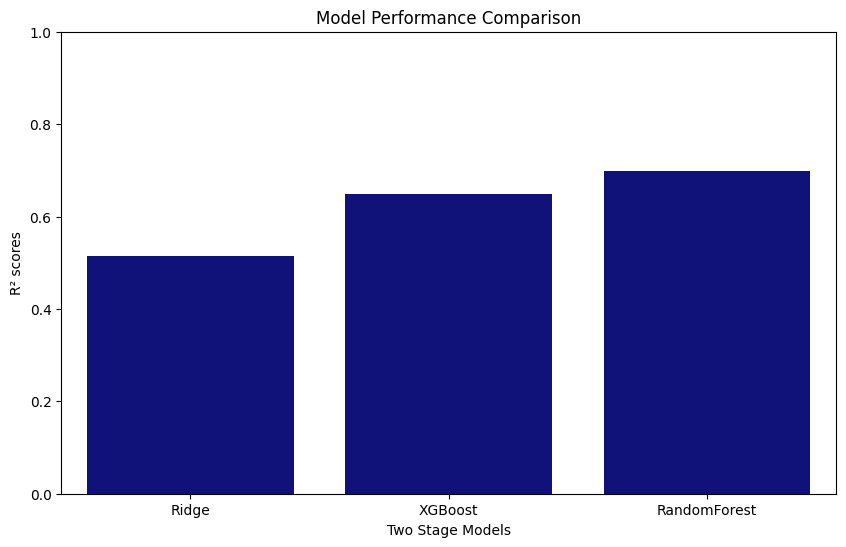

In [71]:
models=['Ridge','XGBoost','RandomForest']
scores=[rid_cl_r2,xgb_cl_r2,rf_cl_r2]

df_scores = pd.DataFrame({
    'Regression Models': models,
    'scores': scores
})

plt.figure(figsize=(10,6))
sns.barplot(data=df_scores, x='Regression Models',y='scores',color='darkblue')
plt.title('Model Performance Comparison')
plt.xlabel('Two Stage Models')
plt.ylabel('R² scores')
plt.ylim(0,1)
plt.show()

# b) Regression Modelling Only

In [72]:
#baseline model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error   
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
lr2 = r2_score(y_test, y_pred)

print("R² Score on Linear Model:", lr2)

R² Score on Linear Model: 0.4750118419238156


In [73]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rid_r2 = r2_score(y_test, y_pred)

print("R² Score on Ridge:", rid_r2 )

R² Score on Ridge: 0.4750156815273425


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.96087e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [74]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

xgbr = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1)
xgbr.fit(X_train,(y_train))
y_pred = (xgbr.predict(X_test))
xr2 = r2_score(y_test, y_pred)
print("R² Score on XGB:", xr2)

R² Score on XGB: 0.6053943117559886


In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

rfinal = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rfinal.fit(X_train, y_train)
y_pred = rfinal.predict(X_test)
rr2 = r2_score(y_test, y_pred)

print("Random Forest R² Score:", rr2)

Random Forest R² Score: 0.707967197692242


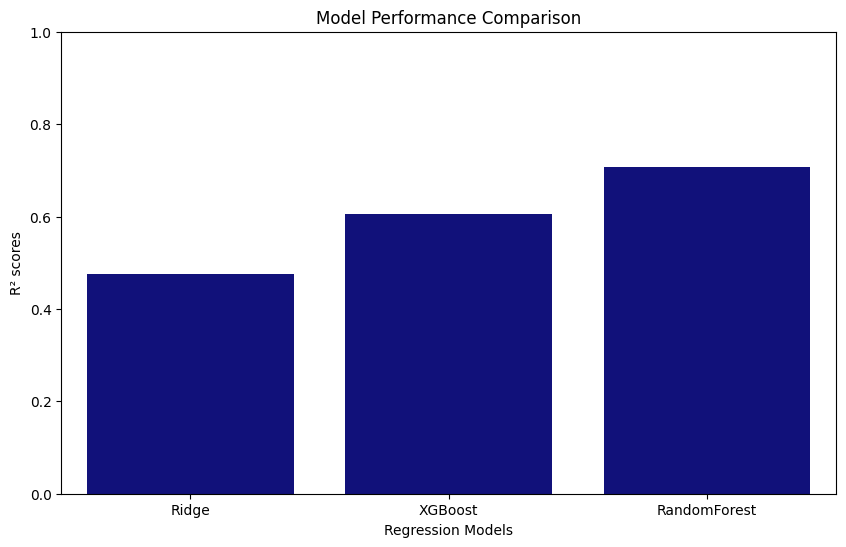

In [76]:
models=['Ridge','XGBoost','RandomForest']
scores=[rid_r2,xr2,rr2]

df_scores = pd.DataFrame({
    'Regression Models': models,
    'scores': scores
})

plt.figure(figsize=(10,6))
sns.barplot(data=df_scores, x='Regression Models',y='scores',color='darkblue')
plt.title('Model Performance Comparison')
plt.xlabel('Regression Models')
plt.ylabel('R² scores')
plt.ylim(0,1)
plt.show()

# **7. Best Model**

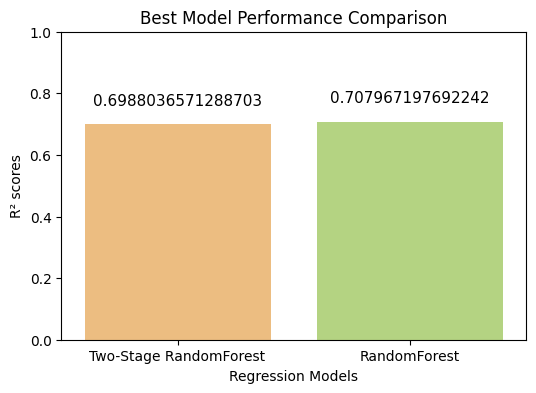

In [77]:
models=['Two-Stage RandomForest','RandomForest']
scores=[rf_cl_r2,rr2]

df_scores = pd.DataFrame({
    'Regression Models': models,
    'scores': scores
})

plt.figure(figsize=(6,4))
sns.barplot(data=df_scores, x='Regression Models',y='scores',palette='RdYlGn')
plt.title('Best Model Performance Comparison')
plt.ylabel('R² scores')
plt.ylim(0,1)
for i, v in enumerate(scores):
    plt.text(i, v + 0.1, str(v), ha='center', va='top', fontsize=11)
    
plt.show()

In [78]:
importances = rfinal.feature_importances_
feature_names = colums.get_feature_names_out()

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(15))

                              Feature  Importance
108           remainder__interaction1    0.512688
107     remainder__page_views/session    0.116024
106         remainder__hits/page_view    0.062051
100             scaler__sessionNumber    0.046795
99                  scaler__totalHits    0.026468
101                 scaler__pageViews    0.018717
111             remainder__month_year    0.014094
112                remainder__q_month    0.013981
104                  remainder__Month    0.012514
93   user_channel__userChannel_Direct    0.007448
32                    new_day__Day_18    0.006683
47            new_quarter__Quarter_Q2    0.006654
6                  new_os__os_Windows    0.005645
105               remainder__heavy_pv    0.005198
33                    new_day__Day_19    0.004668


# **8. Hyperparameter Tuning of Best Model** 

In [79]:
# from sklearn.model_selection import RandomizedSearchCV
# param_dist = {
#     'n_estimators': [100, 150, 200, 300, 400, 500],
#     'max_depth': [None, 5, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [1.0, 'sqrt', 'log2']
# }

# rfinal = RandomForestRegressor(random_state=42)

# rs = RandomizedSearchCV(
#     estimator=rfinal,
#     param_distributions=param_dist,
#     n_iter=50,  # number of combinations to try
#     scoring='r2',
#     cv=3,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )
# rs.fit(X_train, y_train)
# print("Best Params:", rs.best_params_)
# print("Best CV R² Score:", rs.best_score_)

# best_model = rs.best_estimator_
# y_pred = best_model.predict(X_test)
# print("Final R² on test set:", r2_score(y_test, y_pred))


In [80]:
#Best Params: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': 40}

# **9. Test Dataset Transformations**

In [81]:
X1_test.shape

(29006, 48)

In [82]:
pd.set_option('display.max_columns', 60)
print('Top 5 Columns of Test Dataset:')
X1_test.head()

Top 5 Columns of Test Dataset:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,userChannel,date,browser,device.browserSize,device.browserVersion,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,os,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.continent,locationCountry,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,socialEngagementType,totals.bounces,totalHits,new_visits,pageViews,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.referralPath,trafficSource,sessionId,sessionNumber,sessionStart,userId,locationZone,browserMajor,screenSize,gclIdPresent
0,Social,20170508,Chrome,not available in demo dataset,not available in demo dataset,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,domain2,not available in demo dataset,not available in demo dataset,Northern America,Not Socially Engaged,NaN,11,NaN,10.0,1,NaN,NaN,NaN,NaN,NaN,(not set),True,NaN,/a/google.com/forum/,groups.google.com,1494262567,2,1494262567,59555,8,not available in demo dataset,medium,0
1,Organic Search,20170405,Chrome,not available in demo dataset,not available in demo dataset,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Palo Alto,Americas,United States,San Francisco-Oakland-San Jose CA,domain1,not available in demo dataset,California,Northern America,Not Socially Engaged,NaN,9,1.0,9.0,1,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),NaN,google,1491433811,1,1491433811,6394,8,not available in demo dataset,medium,0
2,Organic Search,20170308,Safari,not available in demo dataset,not available in demo dataset,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,Philadelphia,Americas,United States,Philadelphia PA,domain2,not available in demo dataset,Pennsylvania,Northern America,Not Socially Engaged,NaN,2,1.0,2.0,1,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),NaN,google,1489001815,1,1489001815,38969,8,not available in demo dataset,medium,0
3,Referral,20171113,Chrome,not available in demo dataset,not available in demo dataset,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,domain2,not available in demo dataset,not available in demo dataset,Northern America,Not Socially Engaged,NaN,3,NaN,3.0,1,NaN,NaN,NaN,NaN,NaN,(not set),True,NaN,/document/d/1GSpeJSCBhxRNya7kiUbBKO3rR20jBBBF3...,docs.google.com,1510593024,30,1510593024,120027,8,not available in demo dataset,medium,0
4,Organic Search,20161212,Chrome,not available in demo dataset,not available in demo dataset,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available

In [83]:
X1_test.describe()

,date,totals.bounces,totalHits,new_visits,pageViews,totals.visits,trafficSource.adwordsClickInfo.page,sessionId,sessionNumber,sessionStart,userId,locationZone,gclIdPresent
count,2.900600e+04,11732.0,29006.000000,20094.0,29003.000000,29006.0,1107.000000,2.900600e+04,29006.000000,2.900600e+04,29006.000000,29006.0,29006.000000
mean,2.016855e+07,1.0,10.659519,1.0,8.470813,1.0,1.015357,1.493320e+09,2.595980,1.493320e+09,61327.854134,8.0,0.038268
std,6.200443e+03,0.0,19.771218,0.0,14.561705,0.0,0.177227,1.532493e+07,9.333323,1.532493e+07,35253.344987,0.0,0.191846
min,2.016080e+07,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.470035e+09,1.000000,1.470035e+09,8.000000,8.0,0.000000
25%,2.016112e+07,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.479931e+09,1.000000,1.479931e+09,31006.500000,8.0,0.000000
50%,2.017041e+07,1.0,2.000000,1.0,2.000000,1.0,1.000000,1.491492e+09,1.000000,1.491492e+09,61430.500000,8.0,0.000000
75%,2.017091e+07,1.0,12.000000,1.0,10.000000,1.0,1.000000,1.505148e+09,2.000000,1.505148e+09,91866.250000,8.0,0.000000
max,2.018043e+07,1.0,500.000000,1.0,466.000000,1.0,5.000000,1.525152e+09,334.000000,1.525152e+09,122268.000000,8.0,1.000000


In [84]:
print('Unique Values in each column in Test Dataset:')
X1_test.nunique()

Unique Values in each column in Test Dataset:


userChannel                                         8
date                                              638
browser                                            26
device.browserSize                                  1
device.browserVersion                               1
device.flashVersion                                 1
device.isMobile                                     2
device.language                                     1
device.mobileDeviceBranding                         1
device.mobileDeviceMarketingName                    1
device.mobileDeviceModel                            1
device.mobileInputSelector                          1
os                                                 14
device.operatingSystemVersion                       1
device.screenColors                                 1
device.screenResolution                             1
geoNetwork.city                                   447
geoNetwork.continent                                6
locationCountry             

In [85]:
X1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   userChannel                                   29006 non-null  object 
 1   date                                          29006 non-null  int64  
 2   browser                                       29006 non-null  object 
 3   device.browserSize                            29006 non-null  object 
 4   device.browserVersion                         29006 non-null  object 
 5   device.flashVersion                           29006 non-null  object 
 6   device.isMobile                               29006 non-null  bool   
 7   device.language                               29006 non-null  object 
 8   device.mobileDeviceBranding                   29006 non-null  object 
 9   device.mobileDeviceMarketingName              29006 non-null 

In [86]:
print('Columns containing Null Values in Test Dataset:', X1_test.isnull().sum())

Columns containing Null Values in Test Dataset: userChannel                                         0
date                                                0
browser                                             0
device.browserSize                                  0
device.browserVersion                               0
device.flashVersion                                 0
device.isMobile                                     0
device.language                                     0
device.mobileDeviceBranding                         0
device.mobileDeviceMarketingName                    0
device.mobileDeviceModel                            0
device.mobileInputSelector                          0
os                                                  0
device.operatingSystemVersion                       0
device.screenColors                                 0
device.screenResolution                             0
geoNetwork.city                                     0
geoNetwork.continent              

In [87]:
X1_test = X1_test.drop(columns=drop_cols)
X1_test=clean_data(X1_test)
X1_test.isnull().sum()

userChannel                  4
date                         0
browser                      0
os                           0
geoNetwork.continent        35
geoNetwork.networkDomain     0
geoNetwork.subContinent     35
totalHits                    0
new_visits                   0
pageViews                    0
trafficSource                0
sessionNumber                0
dtype: int64

In [88]:
X1_test['date'] = pd.to_datetime(X1_test['date'].astype(str), format='%Y%m%d')
X1_test['Day'] = pd.to_datetime(X1_test['date']).dt.day
X1_test['Month'] = pd.to_datetime(X1_test['date']).dt.month
X1_test['Year'] = pd.to_datetime(X1_test['date']).dt.year
X1_test['DayOfWeek'] = X1_test['date'].dt.dayofweek
X1_test=X1_test.drop(columns=['date'])

X1_test['trafficSource']=X1_test['trafficSource'].apply(sources)
X1_test['browser']=X1_test['browser'].apply(browsers)
X1_test['os']=X1_test['os'].apply(os)
X1_test['Quarter']=X1_test['Month'].apply(quarters)
print(X1_test.columns)

Index(['userChannel', 'browser', 'os', 'geoNetwork.continent',
       'geoNetwork.networkDomain', 'geoNetwork.subContinent', 'totalHits',
       'new_visits', 'pageViews', 'trafficSource', 'sessionNumber', 'Day',
       'Month', 'Year', 'DayOfWeek', 'Quarter'],
      dtype='object')


In [89]:
X1_test['hits/page_view'] = X1_test['totalHits'] / X1_test['pageViews']
X1_test['page_views/session'] = X1_test['pageViews'] / X1_test['sessionNumber']
X1_test['interaction1'] = X1_test['pageViews'] * X1_test['sessionNumber']
X1_test['month_year'] = X1_test['Month'].astype(str)+'_'+X1_test['Year'].astype(str)
X1_test['q_month'] = X1_test['Quarter'].astype(str)+'_'+X1_test['Month'].astype(str)
X1_test['quick_exit'] = (X1_test['hits/page_view'] < 2).astype(int)
# X1_test['new_users_pveng'] = X1_test['pageViews'] * X1_test['new_visits']
# X1_test['new_users_sneng'] = X1_test['sessionNumber'] * X1_test['new_visits']
# X1_test['new_users_theng'] = X1_test['totalHits'] * X1_test['new_visits']
X1_test['session_activity']= pd.cut(X1_test['sessionNumber'], bins=sess_bins, labels=sess_labels, include_lowest=True)
X1_test['user_activity'] = pd.cut(X1_test['pageViews'], bins=bins, labels=labels, include_lowest=True)
X1_test['conversion_probability'] = X1_test.apply(lambda row: prob(row['new_visits'], row['pageViews'], row['sessionNumber']), axis=1)
X1_test['low_activity'] = X1_test.apply(lambda row: low_activity(row['pageViews'], row['totalHits'], row['sessionNumber']), axis=1)
pv_test = X1_test['pageViews'].quantile(0.99)
X1_test['heavy_pv'] = (X1_test['pageViews'] > pv_test).astype(int)

In [90]:
X1_test = encoder_te.transform(X1_test)
X1_test=pipeline.transform(X1_test)
X1_test.shape[1]

113

In [91]:
X_trans = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_test)], axis=0)
y_trans = pd.concat([pd.Series(y_train), pd.Series(y_test)], axis=0)
rfinal.fit(X_trans,y_trans)

y_rf_pred = rfinal.predict(X1_test)

In [92]:
submission=pd.DataFrame({"id":range(0,X1_test.shape[0]),"purchaseValue":y_rf_pred})
submission.to_csv('submission.csv',index=False)

In [93]:
print(submission.shape[0])  

29006
